# Lab 6: Spatial and Attribute Join


In this lab we will practise to convert spatial data from one model to another using different operations.

## Task 1: Using spatial join to aggregate points in polygons

Spatial join is a very useful operation to aggregate and relate different vector datasets (e.g. point, line or polygons). For instance, spatial join can be used to count the number of points in polygon boundaries. In this task, you will aggregate crime incidents (points) in Oahu into census tract boundaries (polygons) using spatial join. When crime incidents are aggregated in census tracts, you can calculate crime rate and analyze the relation between crime rate and other variables reported in census tract.

First, we read the census tract polygons from your computer

In [1]:
import geopandas
censustract = geopandas.read_file("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/labs/lab6_data/CensusTract_Oahu.shp")

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


Are you tired of typing or copying&pasting the long file path every time? You will feel more tired if you need to load many datasets.

One way to skip typing the full path is setting your working directory to the folder of all your data. Once the working directory is set, you can read datasets with only the file names without the long path in front.

In [2]:
# Import os package and set working directory.
import os
os.chdir("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/labs/lab6_data/")

Try re-read the census tract data without the long path.

In [3]:
censustract = geopandas.read_file("CensusTract_Oahu.shp")

Complete the following code to read the crime data (burglary.shp)

In [4]:
crime = geopandas.read_file("burglary.shp")

Preview the two datasets.

In [5]:
censustract.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,15,003,000110,1400000US15003000110,15003000110,1.10,CT,6620520,1030241,"POLYGON ((-157.678725 21.296651, -157.678367 2..."
1,15,003,001201,1400000US15003001201,15003001201,12.01,CT,533270,0,"POLYGON ((-157.810982 21.289569, -157.809631 2..."
2,15,003,002701,1400000US15003002701,15003002701,27.01,CT,1496247,0,"POLYGON ((-157.821176 21.296803, -157.821042 2..."
3,15,003,003502,1400000US15003003502,15003003502,35.02,CT,420007,0,"POLYGON ((-157.843234 21.301588, -157.842298 2..."
4,15,003,006000,1400000US15003006000,15003006000,60,CT,716212,0,"POLYGON ((-157.887754 21.335141, -157.88425 21..."


In [6]:
crime.head()

,Time,Location,geometry
0,2018-03-30,3300 BLOCK WINAM AVE,POINT (-157.811612 21.2783436)
1,2018-03-30,3400 BLOCK UPPER ST,POINT (-157.8088849 21.2756938)
2,2018-03-30,2100 BLOCK 10TH AVE,POINT (-157.7926433 21.2985348)
3,2018-03-30,911000 BLOCK KEONEULA BLVD,POINT (-158.0224143 21.3204976)
4,2018-03-30,3300 BLOCK GEORGE ST,POINT (-157.8101346 21.2734281)


### Question 1: Please use an appropriate method (or function) to find the number of features (points and polygons) in the two datasets.

### Question 2: Please create a map to display crime points on top of the census tract boundaries.

Your map should be like the following.

Tip: you can refer to previous labs to finish this question.

<img src="images/fig17.jpg" width="500" align="left">


In [7]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(15, 10))

censustract.plot(edgecolor='black', ax=ax)
crime.plot(marker='o', color='red', markersize=0.1,ax=ax)

Next, we will calculate the crime count in each census tract by spatial joining the crime points to the census tract polygons.

This task can be completed by the following steps:

- First, read two datasets `censustract` and `crime`.
- Second, join the crime points to census tracts. After joining, each census tract has been duplicated for each crime point in the tract.
- Third, group the duplicated census tracts by their unique IDs (GEOID or AFFGEOID), and calculated the crime count in each tract.
- Finally, extract a column of crime counts and joined the column to `censustract`.

This procedure sounds complicated. But, it can be done in 4-5 lines of code. These joining methods are very useful in processing and manipulating spatial data.

First, let's do the spatial join. The `sjoin` function in `geopandas` support spatial join based on spatial relations.

Note: the join dataset is the first argument in the function, followed by the destination dataset. Reverse positions will lead to a reverse join (i.e. join polygon to points). The `op` parameter defines the spatial relation for the join.

If you are unfamiliar with a function, you can always google the function name to find the documentation or examples. The usage of 'geopandas.sjoin' can be found [here](http://geopandas.org/mergingdata.html)

In [8]:
joined = geopandas.sjoin(censustract,crime, how="inner", op='intersects')

After checking the metadata of `joined` (using the method in Question 1), you can see that the number of features in `joined` (49058 features) equals the number of crime points. 

After the spatial join, each census tract has been duplicated for each point in the tract. In a preview of `joined`, you can find the same GEOID or AFFGEOID (the ID number of a census tract) repeats many times.

You can aggregate the duplicated features in `joined` by the column of GEOID or AFFGEOID. 

In [9]:
crime_inct = joined.groupby(['GEOID']).count()

In the metadata, you can see that `crime_inct` has 242 features, which is the same as the number of census tracts in Oahu. This means the rows in `joined` has been aggregated in the 242 census tracts.

In a preview of `crime_inct`, you can see all columns have the same numbers, which are the crime counts in the census tracts. However, `crime_inct` is a dataframe (no geometry). So you need to join (attribute join) the crime counts back to the geodataframe `censustract` for mapping and spatial analysis.

### Question 4: please write code to join crime counts to `censustract`:

- 1. Extract one column from `crime_inct`

- 2. Rename the extract column to `crime`. Please check [here](https://erikrood.com/Python_References/rename_columns.html) for examples of renaming a column in a data frame. Otherwise, you can google 'Python rename column dataframe' to find relevant pages, usually in the function documentation or stackoverflow.

- 3. Join the renamed column to `censustract`, using either AFFGEOID or GEOID as the key. You can use the `merge` function of dataframe to join two tables. Description and examples of 'merge' can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).

When question 4 is done, preview `censustract` to see the difference

In [10]:
# Get a column from crime_inct
crime_count = crime_inct[['STATEFP']]

# Rename the column to crime
crime_count = crime_count.rename(columns={'STATEFP': 'crime'})

# Join the column to censustract using GEOID as the key
censustract = censustract.merge(crime_count, left_on='GEOID', right_on='GEOID')

### Question 5: please create a choropleth map to display crime counts in the census tract.

Tip: you can refer to Lab 5 to create choropleth map. Please use the equal interval classification method for the coloring.

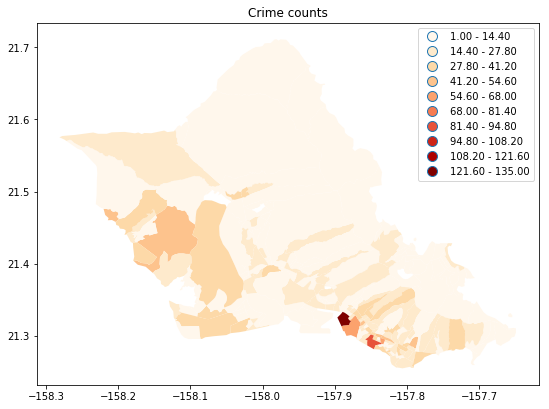

In [11]:
f, ax = plt.subplots(1, figsize=(9, 9))
censustract.plot(column='crime', scheme='equal_interval', k=10, cmap='OrRd', legend=True, ax=ax)
plt.title("Crime counts")

plt.show()

---

# Task 2: Attribute Join with census tract population data

The choropleth map in Question 5 shows total the counts of crimes in the census tracts. However, a census tract with a large count  does not neccessarily mean a higher risk of crime. The total count is highly dependent on the total population in the census tract. A large census tract includes more population, which naturally have a high crime count. To eliminate the effect of population and unit size, we can calculate the crime rate, which is the crime count per 1000 population, which better indicates the probability of crime. Crime rate can be calculated by:

$$
\begin{align*}
CrimeRate = CrimeCount/Population*1000
\end{align*}
$$

In the previous task, we joined crime counts to `censustract`. Now we need population to calculate crime rate. In the data provided by the U.S. Census Bureau, there are hundreds of socio-economic and demographic variables reported in census tracts. For efficient data management, these variables are stored in separate tables. People can pull only the tables they need, and join the tables to other tables or geospatial data (e.g. geodataframe) using the unique IDs of census tracts.

In this task, we will join the table (`pop.csv`) containing population data to `censustract` in order to calculate crime rate.

First, please write code to read the `pop.csv` in your data folder into a dataframe `pop`.

Note: consider what package and function to read spreadsheet (e.g. csv). If you cannot remember, you can ask Google or previous labs.

In [12]:
import pandas as pd
pop = pd.read_csv('pop.csv')

Preview the `pop` and check the metadata 

In [13]:
pop.head()

,GEOID,population
0,1400000US15001020100,725.0
1,1400000US15001020202,349.0
2,1400000US15001020300,323.0
3,1400000US15001020400,279.0
4,1400000US15001020500,401.0


In [14]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 2 columns):
GEOID         351 non-null object
population    349 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


### Question 6: Please join the population data `pop` to `censustract`.

Please complete the following code to join `pop` to `censustract` and store the output a new dataframe `censustract2`

Tip: attribute join is joining data by matching keys in two tables. Consider which columns in the two tables can be used as the keys for the joining.

Tip: you can refer to Task 1 about attribute join.

In [15]:
censustract2 = censustract.merge(pop, left_on='AFFGEOID', right_on='GEOID')

Now, both crime count and population are organized in `censustract2`. Please complete the following code to calculate crime rate and store it in a new column **crime_rate** in `censustract2`.

In [16]:
censustract2['crime_rate'] = censustract2['crime']/censustract2['population']*1000

In [17]:
censustract2.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID_x,NAME,LSAD,ALAND,AWATER,geometry,crime,GEOID_y,population,crime_rate
0,15,003,000110,1400000US15003000110,15003000110,1.10,CT,6620520,1030241,"POLYGON ((-157.678725 21.296651, -157.678367 2...",11,1400000US15003000110,422.0,26.066351
1,15,003,001201,1400000US15003001201,15003001201,12.01,CT,533270,0,"POLYGON ((-157.810982 21.289569, -157.809631 2...",34,1400000US15003001201,244.0,139.344262
2,15,003,002701,1400000US15003002701,15003002701,27.01,CT,1496247,0,"POLYGON ((-157.821176 21.296803, -157.821042 2...",25,1400000US15003002701,822.0,30.413625
3,15,003,003502,1400000US15003003502,15003003502,35.02,CT,420007,0,"POLYGON ((-157.843234 21.301588, -157.842298 2...",45,1400000US15003003502,294.0,153.061224
4,15,003,006000,1400000US15003006000,15003006000,60,CT,716212,0,"POLYGON ((-157.887754 21.335141, -157.88425 21...",13,1400000US15003006000,489.0,26.584867


Preview `censustract2` to see if the crime rate is stored in the new column.

As some census tract has 0 population (e.g. conservation area), the divition calculation would lead to infinite numbers (coded as `inf` in Python), which may cause problems when creating maps.

The following code is converting the infinite numbers in the crime_rate column to Not-A-Number (nan).

In [18]:
import numpy as np
censustract2['crime_rate'][censustract2['crime_rate']==np.inf]=np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Question 7: Please create a choropleth map to show crime rate in census tract.

Please visually compare this map with the map of crime counts (in Question 5). Think about the difference between mapping count and rate in polygons with irregular shapes and sizes.

C:\ProgramData\Anaconda3\lib\site-packages\mapclassify\classifiers.py:276: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
C:\ProgramData\Anaconda3\lib\site-packages\mapclassify\classifiers.py:276: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


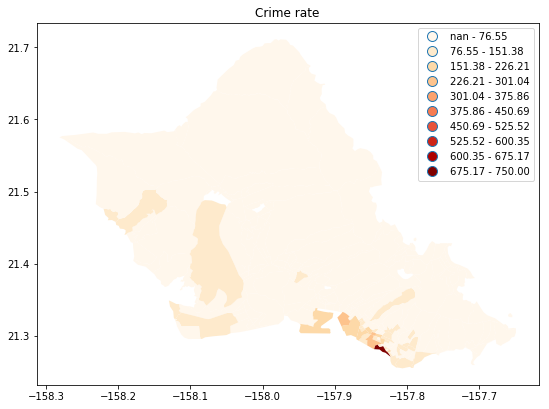

In [19]:
f, ax = plt.subplots(1, figsize=(9, 9))
censustract2.plot(column='crime_rate', scheme='equal_interval', k=10, cmap='OrRd', legend=True, ax=ax)

plt.title("Crime rate")

plt.show()

***

## Task 3: Analyzing the relation between crime and income

To analyze the relation between crime rate and income, you should join income data into the dataframe of crime rate. You have done the similar procedure in Task 2. So please write code to join income data (stored in income.csv) to censustract2.

### Question 8: Please import the income table and join it to `censustract2`

The procedure is similar to Question 6. Please store the output of the join to a new dataframe `censustract3`.

Preview `censustract3` to observe the change.

In [20]:
income = pd.read_csv('income.csv')
censustract3 = censustract2.merge(income, left_on='AFFGEOID', right_on='GEOID')

### Question 9: Create a choropleth map of incomes in census tracts.

Visually compare the map of income and the map of crime rate. Are the spatial distributions similar? Some high-income communities also have a high crime (burgalary) rate, but not always.

Next, we will use some statistical methods to analyze the relation between crime rate and income.

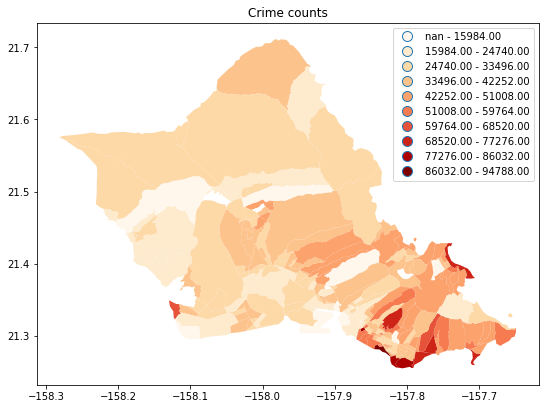

In [21]:
f, ax = plt.subplots(1, figsize=(9, 9))
censustract3.plot(column='per_cap_income', scheme='equal_interval', k=10, cmap='OrRd', legend=True, ax=ax)
plt.title("Crime counts")

plt.show()

In the choropleth maps of crime and income, you can observe the spatial patterns of the two variables. They look similar to some degree, but still different in some areas. You can use linear regression to test the relation between the two variables, examining whether the crime rate increase/decrease with the income. Analyzing relations between the variables can help understand why crime rate is high in some communities. Other than income, the method can also be used to study relations between crime and other variables (e.g. education level, demographic condition, ratio of owner-occupied property....).

First, we create a scatter plot using crime rate and income. 

When creating scatter plot or linear regression, we usually use the horizontal (x) axis to represent the hypothetical cause and vertical (y) axis to represent the hypothetical effect.

In this case, our hypothesis is that communities with a higher income is more or less likely to experience to crime (burglary). Thus, income should be x on the horizontal axis and crime rate should be y on the vertical axis.

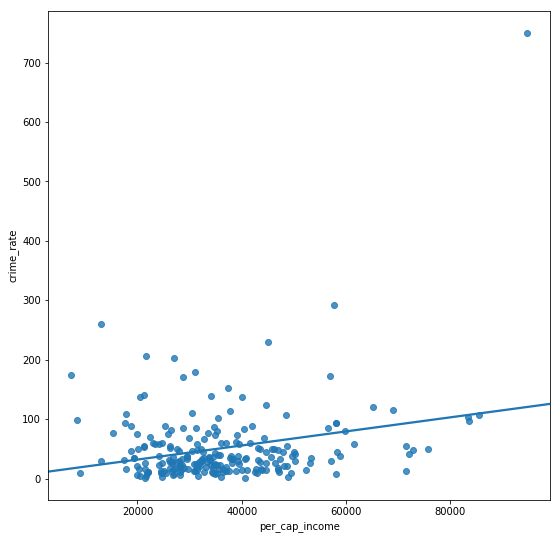

In [22]:
# import the seaborn package
import seaborn as sns

# enlarge the size of plot
f, ax = plt.subplots(1, figsize=(9, 9))

# create the scatter plot and 
sns.regplot(x=censustract3['per_cap_income'], y=censustract3['crime_rate'], ci=None)


In general, the income and crime rate follow a linear relation, but with some deviations. The line approximately describes the trend of the relation. 

To test the significance of the relation, you can do a linear regression between the two variables.

In python, there are many packages for linear regression. We choose the `statsmodels` package here.

Note: when using this package, the y variable (dependent variable) is placed before the x (independent) variable.

In [23]:
# import the package
import statsmodels.api as sm

# fit the linear regression model with income
model = sm.OLS(censustract3['crime_rate'], censustract3['per_cap_income'],missing='drop').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     158.7
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           7.68e-28
Time:                        08:45:49   Log-Likelihood:                -1248.5
No. Observations:                 224   AIC:                             2499.
Df Residuals:                     223   BIC:                             2502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
per_cap_income     0.0014      0.000     12.599      0.000       0.001       0.002
==============================================================================
Omnibus:                      267.201   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15211.630
Skew:                           4.920   Prob(JB):                         0.00
Kurtosis:                      42.154   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To interpret the result: 

As p-value<0.001, it is a high probability that the income and crime_rate follow a linear relation.

Also the positive coefficient (0.0014) indicates the higher income, the higher crime rate.

---

# Submission

Please submit the Jupyter Notebook file (.ipynb) with your code, answers and graphs to Laulima by **Monday, April 22th**.